In [1]:
import sys
sys.path.append('..')
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/processed_reviews.csv')

In [3]:
import BERTopic_kmeans

/Users/jessicaluo/Desktop/BTT-Clorox-Company/clorox_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
importlib.reload(BERTopic_kmeans)
from BERTopic_kmeans import BERTopic_kmeans

In [5]:
method = BERTopic_kmeans(df)

# run on one subcategory

In [6]:
%%time
subcat = 'BODY CARE BODY LOTION'
res_df = method.train_model_subcategory(subcat, verbose=2, calc_similarity=False)


Creating BERTopic kmeans models for BODY CARE BODY LOTION
Creating BERTopic kmeans model for 1.0 star rating with 1525 reviews, 3 topics


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Topic 0: "Product doesn't work on dry skin"
	['product', 'skin', 'lotion', 'use', 'pump', 'bottle', 'buy', 'like', 'dry', 'work', 'break', 'face', 'make', 'didnt', 'order']
Topic 1: "Dead formula or lotions in old or used products"
	['formula', 'new', 'use', 'change', 'lotion', 'old', 'year', 'skin', 'product', 'lip', 'original', 'buy', 'bring', 'just', 'like']
Topic 2: "Strong fragrance does not last, poor skin performance"
	['smell', 'like', 'scent', 'lotion', 'use', 'product', 'change', 'fragrance', 'buy', 'love', 'just', 'strong', 'new', 'good', 'skin']
Finished creating BERTopic kmeans model for 1.0 in 12.08 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 2.0 star rating with 666 reviews, 3 topics
Topic 0: "Moisturizing lotion leaves dry skin feeling like new"
	['skin', 'lotion', 'use', 'product', 'dry', 'feel', 'like', 'new', 'moisturize', 'face', 'work', 'formula', 'make', 'im', 'just']
Topic 1: "Vanilla-scented lotion feels good on

In [8]:
subcat_filter = res_df['subcategory'] == subcat
res_df[subcat_filter & (res_df['star_rating']==1)].sample(5)

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type,bertopic_kmeans_topic_number,bertopic_kmeans_topic_words,bertopic_kmeans_topic_label
412123,Shea Moisture,SheaMoisture Body Moisturizer For Dry Skin 100...,2023-10-02,Amazon,PERSONAL CARE,BODY CARE BODY LOTION,love this product as i buy it at the store and...,1.0,Safety concerns with unsealed product packaging,Competitor,0.0,"product, skin, lotion, use, pump, bottle, buy,...","""Product doesn't work on dry skin"""
429325,Cetaphil,Cetaphil Body Moisturizer Cream for Dry to Ver...,2023-09-11,Walgreens,PERSONAL CARE,BODY CARE BODY LOTION,you do not have it and substitute something i ...,1.0,Positive reviews for a makeup remover (undeter...,Competitor,0.0,"product, skin, lotion, use, pump, bottle, buy,...","""Product doesn't work on dry skin"""
454251,Aveeno,"Aveeno Stress Relief Moisturizing Lotion, 12 f...",2023-08-07,Kroger,PERSONAL CARE,BODY CARE BODY LOTION,this new formula be absolutely awful and it sm...,1.0,Negative reviews and complaints about a produc...,Competitor,1.0,"formula, new, use, change, lotion, old, year, ...","""Dead formula or lotions in old or used products"""
364839,Dr Teal's,Dr Teal's Soothing Lavender Body Lotion - 18 f...,2023-12-25,Walmart,PERSONAL CARE,BODY CARE BODY LOTION,there nothing to like the pump be break and i ...,1.0,Malfunctioning product pump,Competitor,0.0,"product, skin, lotion, use, pump, bottle, buy,...","""Product doesn't work on dry skin"""
266504,Suave,Suave Skin Solution Body Lotion Soothing With ...,2024-04-22,Safeway,PERSONAL CARE,BODY CARE BODY LOTION,first off it be very liquidity and it make my ...,1.0,Positive reviews for a makeup remover (undeter...,Competitor,2.0,"smell, like, scent, lotion, use, product, chan...","""Strong fragrance does not last, poor skin per..."


In [9]:
res_df = method.calculate_similarity_score(subcat)

Time to process chunk 0-1000: 5.22 seconds
Time to process chunk 1000-2000: 4.00 seconds
Time to process chunk 2000-3000: 4.38 seconds
Time to process chunk 3000-4000: 5.06 seconds
Time to process chunk 4000-5000: 4.06 seconds
Time to process chunk 5000-6000: 4.21 seconds
Time to process chunk 6000-7000: 3.88 seconds
Time to process chunk 7000-8000: 3.98 seconds
Time to process chunk 8000-9000: 5.38 seconds
Time to process chunk 9000-10000: 3.79 seconds
Time to process chunk 10000-11000: 4.25 seconds
Time to process chunk 11000-12000: 4.88 seconds
Time to process chunk 12000-13000: 4.77 seconds
Time to process chunk 13000-14000: 4.67 seconds
Time to process chunk 14000-15000: 5.68 seconds
Time to process chunk 15000-16000: 12.32 seconds
Time to process chunk 16000-17000: 6.27 seconds
Time to process chunk 17000-18000: 9.97 seconds
Time to process chunk 18000-19000: 5.69 seconds
Time to process chunk 19000-20000: 4.86 seconds
Time to process chunk 20000-21000: 2.21 seconds
Total process

In [16]:
method.get_topic_information(subcat)

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count
0,1.0,"""Dead formula or lotions in old or used products""",0.447358,464
1,1.0,"""Product doesn't work on dry skin""",0.323704,692
2,1.0,"""Strong fragrance does not last, poor skin per...",0.462792,369
3,2.0,"""Moisturizing lotion leaves dry skin feeling l...",0.487955,311
4,2.0,"""Product works well, but disappointed with occ...",0.168622,112
5,2.0,"""Vanilla-scented lotion feels good on skin, bu...",0.470971,243
6,3.0,"""Moisturizing lotion works well for dry skin""",0.521112,488
7,3.0,"""pleasant lotion scent with nice feel on skin""",0.521213,365
8,3.0,Good lotion product workings,0.323184,206
9,4.0,"""Scented lotion has a nice feel on skin with a...",0.445015,982


In [15]:
rating_avg_similarity = res_df.loc[subcat_filter].groupby('star_rating').agg({'bertopic_kmeans_similarity_score': 'mean'}).reset_index()
rating_avg_similarity

,star_rating,bertopic_kmeans_similarity_score
0,1.0,0.394982
1,2.0,0.428056
2,3.0,0.482645
3,4.0,0.480476
4,5.0,0.459864


In [ ]:
#save the results for body care body lotion
# res_df[subcat_filter].to_csv('../../data/bertopic_kmeans_body_lotion.csv', index=False)

In [ ]:
# res_df = method.df
# res_df[subcat_filter & (res_df['star_rating']==1)].sample(5)

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type,bertopic_kmeans_topic_number,bertopic_kmeans_topic_words,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score
84262,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2023-12-11,Walmart,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,the item be not deliver,1.0,Delivery and Customer Service Issues for Products,Clorox,1.0,"order, item, receive, charge, return, product,...","""Price charged despite no item received or ref...",0.450531
7291,Clorox,Clorox® Clean-Up® Cleaner + Bleach1 Value Pack...,2024-06-10,Amazon,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,i wish i have read the review before order as ...,1.0,Leaking and damaged products upon arrival,Clorox,0.0,"bottle, product, bleach, leak, spray, box, clo...","""Bleach or cleaner sprayer leaking or defectiv...",0.483045
177913,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2023-03-13,Sam's Club,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,the spray bottle stop work after the first ref...,1.0,Leaking and damaged products upon arrival,Clorox,0.0,"bottle, product, bleach, leak, spray, box, clo...","""Bleach or cleaner sprayer leaking or defectiv...",0.293856
65760,Clorox,Clorox® Clean-Up® Cleaner + Bleach1 Value Pack...,2024-01-29,Amazon,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,the spray be deliver with crust dried detergen...,1.0,Effective and Pleasant Cleaning Products,Clorox,0.0,"bottle, product, bleach, leak, spray, box, clo...","""Bleach or cleaner sprayer leaking or defectiv...",0.474775
149999,Hdx,HDX 32 oz. All-Purpose Cleaner with Bleach,2023-07-17,Home Depot,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,too watery didnt clean,1.0,Cleaning product effectiveness differences and...,Competitor,0.0,"bottle, product, bleach, leak, spray, box, clo...","""Bleach or cleaner sprayer leaking or defectiv...",0.447873


# run on multiple subcategories

In [7]:
subcats = ['FLOOR CLEANERS', 'TOILET BOWL CLEANERS', 'SPRAY CLEANERS BLEACH CLEANERS']
# res_df = method.train_model(subcats, verbose=1)

1 min 8 sec in total for ['FLOOR CLEANERS', 'TOILET BOWL CLEANERS', 'SPRAY CLEANERS BLEACH CLEANERS']

In [184]:
res_df[res_df['subcategory'].isin(subcats)].sample(5)

,brand,product_title,proxy_date,retailer,category,subcategory,review_text,star_rating,topic,brand_type,bertopic_kmeans_topic_number,bertopic_kmeans_topic_words,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score
174030,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2023-04-03,Walmart,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,this be just a quick go to for bleach it rly h...,5.0,Disinfectant spray recommendations and reviews...,Clorox,0.0,"clean, use, product, great, smell, love, bathr...","""Effective bleach or cleaneer for bathrooms an...",0.632481
109731,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2023-10-09,Sam's Club,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,perfect to cleann up most surface,5.0,Disinfectant spray recommendations and reviews...,Clorox,0.0,"clean, use, product, great, smell, love, bathr...","""Effective bleach or cleaneer for bathrooms an...",0.462847
69773,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2024-01-15,Walmart,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,always use this in bathroom,4.0,Bathroom cleaner effectiveness and recommendat...,Clorox,0.0,"clean, use, bleach, smell, bathroom, product, ...","""Great bathroom cleaner with strong scent and ...",0.419862
155370,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2023-07-03,Walmart,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,i love the spray it do have bleach but it clea...,5.0,Disinfectant spray recommendations and reviews...,Clorox,0.0,"clean, use, product, great, smell, love, bathr...","""Effective bleach or cleaneer for bathrooms an...",0.587579
90415,Clorox,Clorox Clean-Up All Purpose Cleaner with Bleac...,2023-11-27,Walmart,CLEANING,SPRAY CLEANERS BLEACH CLEANERS,i love to use this cleaner on my kitchen sink ...,5.0,Disinfectant spray recommendations and reviews...,Clorox,0.0,"clean, use, product, great, smell, love, bathr...","""Effective bleach or cleaneer for bathrooms an...",0.490680


In [185]:
topic_infos = []
for subcat in subcats:
    topic_info = method.get_topic_information(subcat)
    topic_info.loc[:, 'subcategory'] = subcat
    topic_infos.append(topic_info)

# concat dataframes in topic_infos

topic_infos_df = pd.concat(topic_infos)
topic_infos_df

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
0,1.0,"""Defective product causes waste, odor, and unw...",0.228132,116,FLOOR CLEANERS
1,1.0,"""Faulty mop breaks and causes water damage""",0.480044,44,FLOOR CLEANERS
2,2.0,"""Broke quickly, poor performance after a month""",0.107240,27,FLOOR CLEANERS
3,2.0,"""Inadequate carpet cleaning or lingering stain...",0.416621,17,FLOOR CLEANERS
4,3.0,"""Effective carpet cleaner with pleasant smell ...",0.415230,39,FLOOR CLEANERS
5,3.0,Here is a concise and coherent phrase that sum...,0.228043,24,FLOOR CLEANERS
6,4.0,"""Effective cleaning with great water, mop, and...",0.383463,32,FLOOR CLEANERS
7,4.0,"""Effective floor and carpet cleaner with good ...",0.409355,63,FLOOR CLEANERS
8,5.0,"""Excellent floor cleaning product with great r...",0.396900,650,FLOOR CLEANERS
0,1.0,"""Blue toilet product doesn't clean effectively...",0.450266,63,TOILET BOWL CLEANERS


In [ ]:
topic_infos_rating_avgd = topic_infos_df.groupby(['subcategory', 'star_rating']).agg({'bertopic_kmeans_similarity_score': 'mean', 'count': 'sum'}).reset_index()
topic_infos_rating_avgd

,subcategory,star_rating,bertopic_kmeans_similarity_score,count
0,FLOOR CLEANERS,1.0,0.354088,160
1,FLOOR CLEANERS,2.0,0.261931,44
2,FLOOR CLEANERS,3.0,0.321636,63
3,FLOOR CLEANERS,4.0,0.396409,95
4,FLOOR CLEANERS,5.0,0.396900,650
5,SPRAY CLEANERS BLEACH CLEANERS,1.0,0.364980,272
6,SPRAY CLEANERS BLEACH CLEANERS,2.0,0.390956,97
7,SPRAY CLEANERS BLEACH CLEANERS,3.0,0.410465,165
8,SPRAY CLEANERS BLEACH CLEANERS,4.0,0.398498,420
9,SPRAY CLEANERS BLEACH CLEANERS,5.0,0.426598,3777


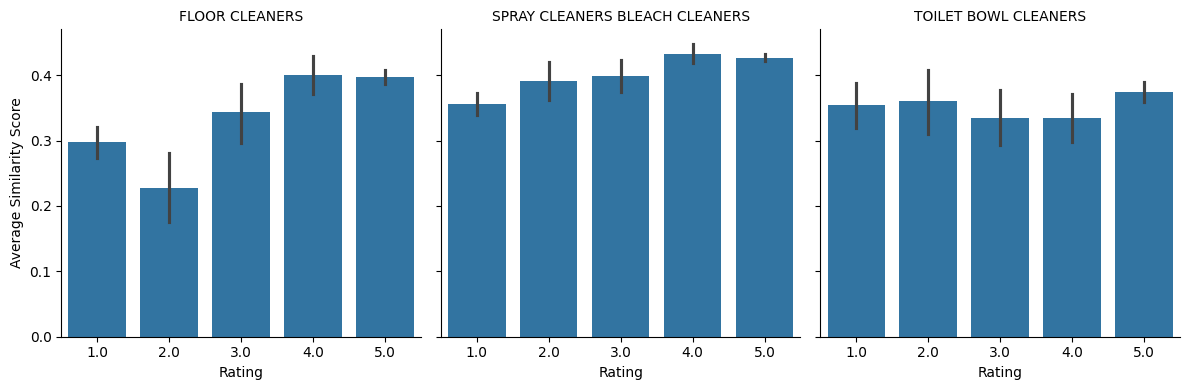

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

subcats_filter = df['subcategory'].isin(subcats)
df_avg_similarity = df[subcats_filter].groupby(['star_rating', 'subcategory']).agg({'bertopic_kmeans_similarity_score': 'mean'}).reset_index()

# Create a FacetGrid with each subcategory in a separate plot
g = sns.FacetGrid(df[subcats_filter], col='subcategory', col_wrap=3, height=4)
g.map(sns.barplot, 'star_rating', 'bertopic_kmeans_similarity_score', order=sorted(df['star_rating'].unique()))
g.set_axis_labels('Rating', 'Average Similarity Score')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()




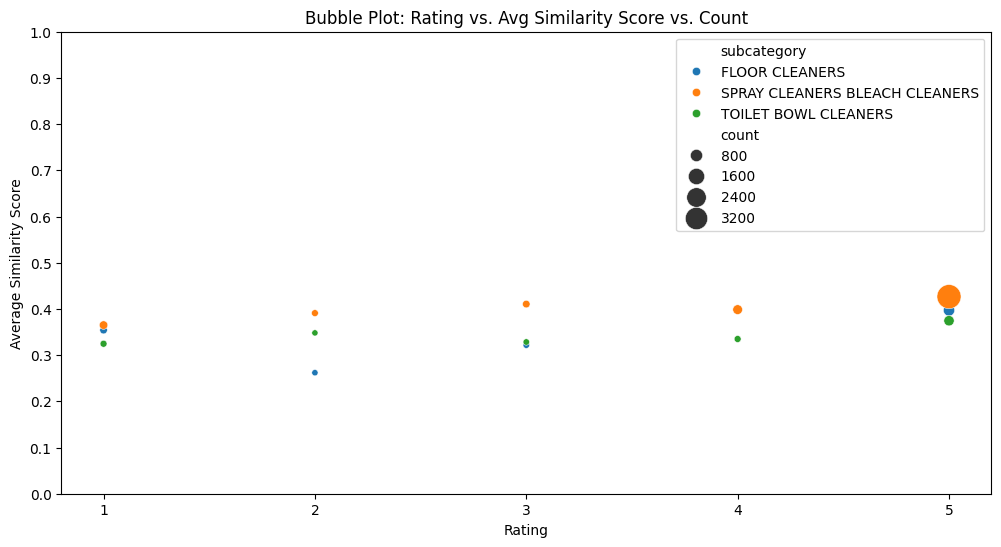

In [190]:
import numpy as np
plt.figure(figsize=(12, 6))
sns.scatterplot(data=topic_infos_rating_avgd, x='star_rating', y='bertopic_kmeans_similarity_score', 
                size='count', sizes=(20, 300), hue='subcategory')
plt.title('Bubble Plot: Rating vs. Avg Similarity Score vs. Count')
plt.xlabel('Rating')
plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Average Similarity Score')
plt.legend()
plt.show()


# using top 15 words

In [20]:
subcats = ['FLOOR CLEANERS', 'TOILET BOWL CLEANERS', 'SPRAY CLEANERS BLEACH CLEANERS']
res_df = method.train_model(subcats, verbose=1)


Creating BERTopic kmeans models for FLOOR CLEANERS
Creating BERTopic kmeans model for 1.0 star rating with 160 reviews, 2 topics
Finished creating BERTopic kmeans model for 1.0 in 3.59 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 2.0 star rating with 44 reviews, 2 topics
Finished creating BERTopic kmeans model for 2.0 in 1.46 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 3.0 star rating with 63 reviews, 2 topics
Finished creating BERTopic kmeans model for 3.0 in 1.52 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 4.0 star rating with 95 reviews, 2 topics
Finished creating BERTopic kmeans model for 4.0 in 1.74 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 5.0 star rating with 650 reviews, 1 topics
Finished creating BERTopic kmeans model for 5.0 in 2.48 seconds

--------------------------------

In [21]:
topic_infos = []
for subcat in subcats:
    topic_info = method.get_topic_information(subcat)
    topic_info.loc[:, 'subcategory'] = subcat
    topic_infos.append(topic_info)

# concat dataframes in topic_infos

topic_infos_df = pd.concat(topic_infos)
topic_infos_df

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
0,1.0,"""Badly built mop breaks easily, requires frequ...",0.508498,44,FLOOR CLEANERS
1,1.0,Poorly designed cleaning product with strong o...,0.283829,116,FLOOR CLEANERS
2,2.0,"""Floor cleaner doesn't work as expected""",0.372651,25,FLOOR CLEANERS
3,2.0,"""Mop breaks easily, doesn't clean well""\n",0.415292,19,FLOOR CLEANERS
4,3.0,"""Good work and clean floor with occasional stain""",0.262900,57,FLOOR CLEANERS
5,3.0,"""Worn out or small issues with mop heads withi...",0.448963,6,FLOOR CLEANERS
6,4.0,"""Effective carpet cleaner with pleasant odor a...",0.445509,46,FLOOR CLEANERS
7,4.0,"""Mop product works well for cleaning floors""",0.304837,49,FLOOR CLEANERS
8,5.0,Great product and easy to clean.,0.376819,650,FLOOR CLEANERS
0,1.0,"""Damaged or incomplete package contents received""",0.200872,38,TOILET BOWL CLEANERS


In [28]:
topic_infos_rating_avgd = topic_infos_df.groupby(['subcategory', 'star_rating']).agg({'bertopic_kmeans_similarity_score': 'mean', 'count': 'sum'}).reset_index()
topic_infos_rating_avgd

,subcategory,star_rating,bertopic_kmeans_similarity_score,count
0,FLOOR CLEANERS,1.0,0.396163,160
1,FLOOR CLEANERS,2.0,0.393972,44
2,FLOOR CLEANERS,3.0,0.355931,63
3,FLOOR CLEANERS,4.0,0.375173,95
4,FLOOR CLEANERS,5.0,0.376819,650
5,SPRAY CLEANERS BLEACH CLEANERS,1.0,0.355045,272
6,SPRAY CLEANERS BLEACH CLEANERS,2.0,0.367049,97
7,SPRAY CLEANERS BLEACH CLEANERS,3.0,0.326011,165
8,SPRAY CLEANERS BLEACH CLEANERS,4.0,0.403975,420
9,SPRAY CLEANERS BLEACH CLEANERS,5.0,0.451706,3777


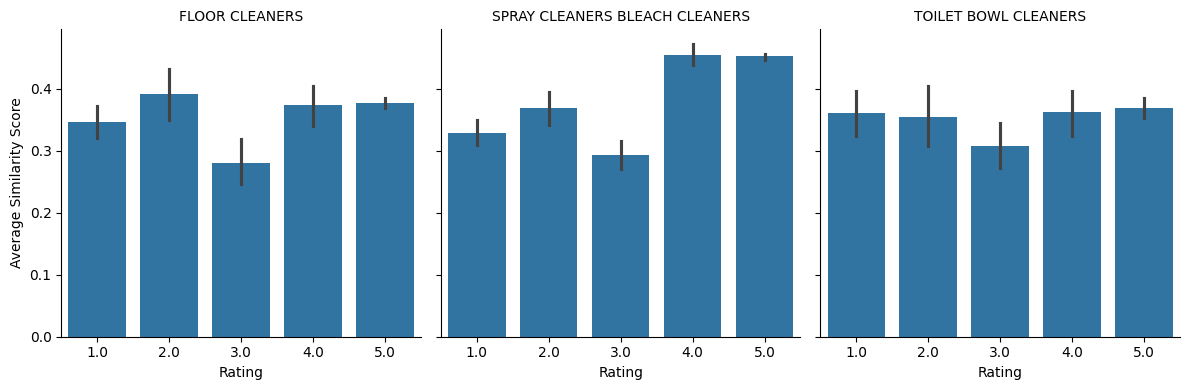

In [23]:
subcats_filter = df['subcategory'].isin(subcats)
df_avg_similarity = df[subcats_filter].groupby(['star_rating', 'subcategory']).agg({'bertopic_kmeans_similarity_score': 'mean'}).reset_index()

# Create a FacetGrid with each subcategory in a separate plot
g = sns.FacetGrid(df[subcats_filter], col='subcategory', col_wrap=3, height=4)
g.map(sns.barplot, 'star_rating', 'bertopic_kmeans_similarity_score', order=sorted(df['star_rating'].unique()))
g.set_axis_labels('Rating', 'Average Similarity Score')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

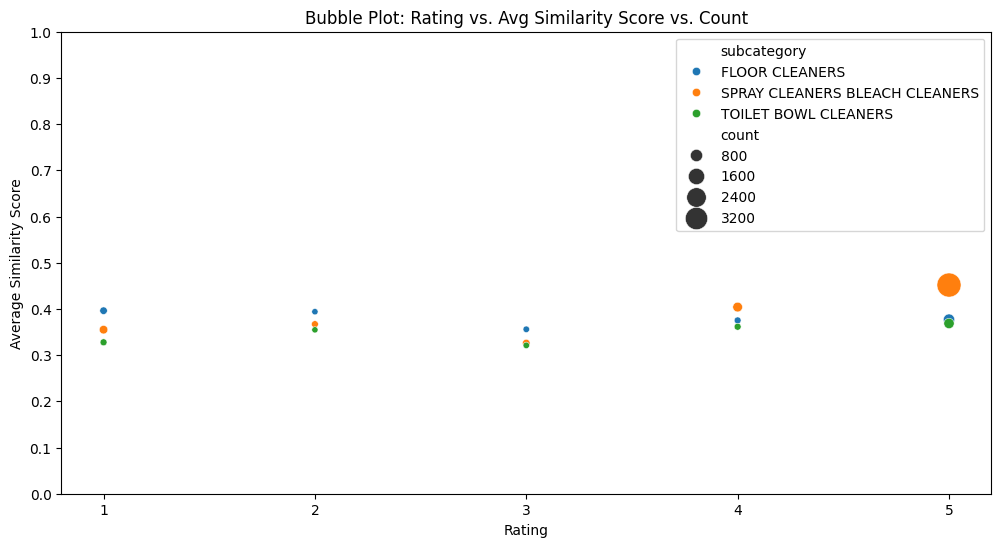

In [24]:
import numpy as np
plt.figure(figsize=(12, 6))
sns.scatterplot(data=topic_infos_rating_avgd, x='star_rating', y='bertopic_kmeans_similarity_score', 
                size='count', sizes=(20, 300), hue='subcategory')
plt.title('Bubble Plot: Rating vs. Avg Similarity Score vs. Count')
plt.xlabel('Rating')
plt.xticks(np.arange(1, 6, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Average Similarity Score')
plt.legend()
plt.show()


In [200]:
topic_infos_df.groupby(['subcategory']).agg({'bertopic_kmeans_similarity_score': 'mean', 'count': 'sum'}).reset_index()

,subcategory,bertopic_kmeans_similarity_score,count
0,FLOOR CLEANERS,0.357949,1012
1,SPRAY CLEANERS BLEACH CLEANERS,0.391888,4731
2,TOILET BOWL CLEANERS,0.321522,802


# using top 10 words

In [12]:
res2_df = method.train_model(subcats, verbose=1, top_n_words=10)
topic_infos2 = []
for subcat in subcats:
    topic_info = method.get_topic_information(subcat)
    topic_info.loc[:, 'subcategory'] = subcat
    topic_infos2.append(topic_info)

# concat dataframes in topic_infos

topic_infos2_df = pd.concat(topic_infos2)
topic_infos2_df


Creating BERTopic kmeans models for FLOOR CLEANERS
Creating BERTopic kmeans model for 1.0 star rating with 160 reviews, 2 topics


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Finished creating BERTopic kmeans model for 1.0 in 3.40 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 2.0 star rating with 44 reviews, 2 topics
Finished creating BERTopic kmeans model for 2.0 in 1.69 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 3.0 star rating with 63 reviews, 2 topics
Finished creating BERTopic kmeans model for 3.0 in 1.70 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 4.0 star rating with 95 reviews, 2 topics
Finished creating BERTopic kmeans model for 4.0 in 1.91 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 5.0 star rating with 650 reviews, 1 topics
Finished creating BERTopic kmeans model for 5.0 in 4.41 seconds

--------------------------------------------------
Finished creating BERTopic kmeans models for FLOOR CLEANERS in 13.24 seconds
----------------------------------

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
0,1.0,"""Unreliable mop breaks easily and performs poo...",0.517855,44,FLOOR CLEANERS
1,1.0,Invalid product performance due to poor cleaning.,0.265224,116,FLOOR CLEANERS
2,2.0,"""Carpet stained like seat: horrible smell when...",0.446662,14,FLOOR CLEANERS
3,2.0,"""Mop does not work well on floors""",0.332681,30,FLOOR CLEANERS
4,3.0,Cleaner clears stains on carpet and floor pads,0.402031,35,FLOOR CLEANERS
5,3.0,"Mop work ok, need replacement frequently.",0.328626,28,FLOOR CLEANERS
6,4.0,"""Effective cleaner for carpets and floors with...",0.477472,36,FLOOR CLEANERS
7,4.0,"""Good product for effective and easy cleaning""",0.329012,59,FLOOR CLEANERS
8,5.0,"""Effective cleaning and stain removal on carpe...",0.377815,650,FLOOR CLEANERS
0,1.0,"""Blue toilet water not clean due to product is...",0.446359,67,TOILET BOWL CLEANERS


In [14]:
topic_infos2_rating_avgd = topic_infos2_df.groupby(['subcategory', 'star_rating']).agg({'bertopic_kmeans_similarity_score': 'mean', 'count': 'sum'}).reset_index()
topic_infos2_rating_avgd

,subcategory,star_rating,bertopic_kmeans_similarity_score,count
0,FLOOR CLEANERS,1.0,0.391539,160
1,FLOOR CLEANERS,2.0,0.389671,44
2,FLOOR CLEANERS,3.0,0.365329,63
3,FLOOR CLEANERS,4.0,0.403242,95
4,FLOOR CLEANERS,5.0,0.377815,650
5,SPRAY CLEANERS BLEACH CLEANERS,1.0,0.358807,272
6,SPRAY CLEANERS BLEACH CLEANERS,2.0,0.331462,97
7,SPRAY CLEANERS BLEACH CLEANERS,3.0,0.395932,165
8,SPRAY CLEANERS BLEACH CLEANERS,4.0,0.380050,420
9,SPRAY CLEANERS BLEACH CLEANERS,5.0,0.321436,3777


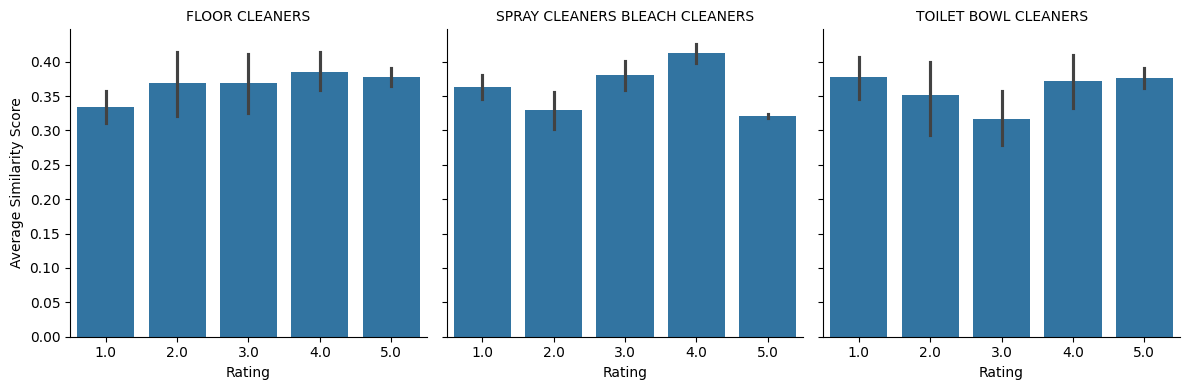

In [17]:
subcats_filter = res2_df['subcategory'].isin(subcats)

# Create a FacetGrid with each subcategory in a separate plot
g = sns.FacetGrid(res2_df[subcats_filter], col='subcategory', col_wrap=3, height=4)
g.map(sns.barplot, 'star_rating', 'bertopic_kmeans_similarity_score', order=sorted(df['star_rating'].unique()))
g.set_axis_labels('Rating', 'Average Similarity Score')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

# compare results using top 15 vs top 10

In [30]:
topic_comp = pd.merge(topic_infos_rating_avgd, topic_infos2_rating_avgd, on=['subcategory', 'star_rating'], suffixes=('_15', '_10'))
topic_comp['diff_avg_similarity'] = topic_infos_rating_avgd['bertopic_kmeans_similarity_score'] - topic_infos2_rating_avgd['bertopic_kmeans_similarity_score']  # with 15 words - with 10 words
topic_comp

,subcategory,star_rating,bertopic_kmeans_similarity_score_15,count_15,bertopic_kmeans_similarity_score_10,count_10,diff_avg_similarity
0,FLOOR CLEANERS,1.0,0.396163,160,0.391539,160,0.004624
1,FLOOR CLEANERS,2.0,0.393972,44,0.389671,44,0.004300
2,FLOOR CLEANERS,3.0,0.355931,63,0.365329,63,-0.009397
3,FLOOR CLEANERS,4.0,0.375173,95,0.403242,95,-0.028069
4,FLOOR CLEANERS,5.0,0.376819,650,0.377815,650,-0.000996
5,SPRAY CLEANERS BLEACH CLEANERS,1.0,0.355045,272,0.358807,272,-0.003762
6,SPRAY CLEANERS BLEACH CLEANERS,2.0,0.367049,97,0.331462,97,0.035587
7,SPRAY CLEANERS BLEACH CLEANERS,3.0,0.326011,165,0.395932,165,-0.069922
8,SPRAY CLEANERS BLEACH CLEANERS,4.0,0.403975,420,0.380050,420,0.023926
9,SPRAY CLEANERS BLEACH CLEANERS,5.0,0.451706,3777,0.321436,3777,0.130270


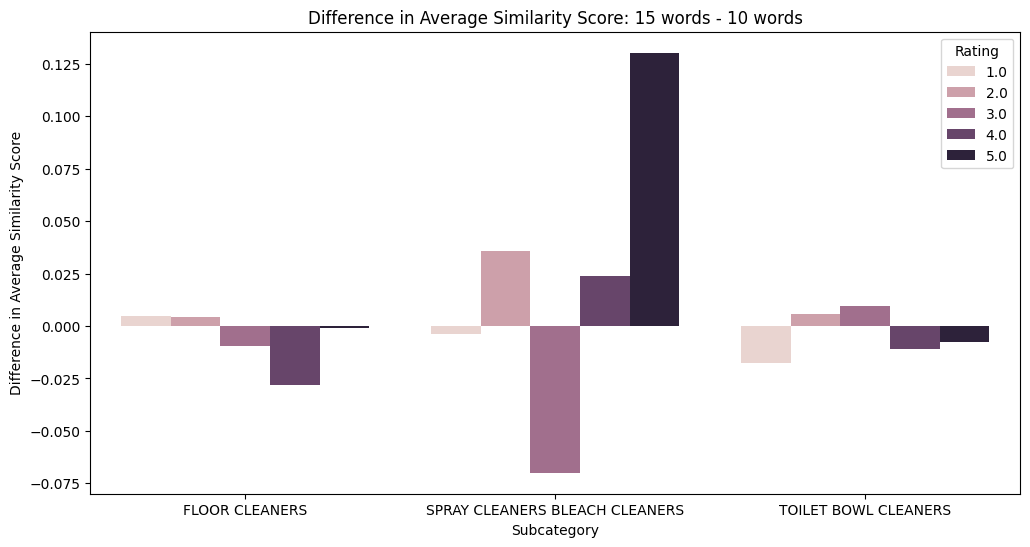

In [31]:
# plot the difference in average similarity score
plt.figure(figsize=(12, 6))
sns.barplot(data=topic_comp, x='subcategory', y='diff_avg_similarity', hue='star_rating')
plt.title('Difference in Average Similarity Score: 15 words - 10 words')
plt.xlabel('Subcategory')
plt.ylabel('Difference in Average Similarity Score')
plt.legend(title='Rating')
plt.show()

with 15 words, avg similarity much higher for 5 star ratings, but much lower for 3 star ratings
- with 15 words, one topic for 3 star rating was very general  
    - "Effective product working well for most users"  0.21
    - "Likable cleaning product with strong scent, g...	  0.438
- with 10 words, both topics contained some specific detail 
    - "Effective cleaning with pleasant smell and ea..."   0.49
    - "Satisfactory clorox product with occasional l..."   0.34

=> could prompt llm to be more specific in some cases, and could be more coherent
- "Great product love in bathroom use"	is too choppy

In [ ]:
# select topic info for 3 star rating subcategory spray cleaners bleach cleaners
subcat = 'SPRAY CLEANERS BLEACH CLEANERS'
pd.set_option('display.max_colwidth', None)
topic_infos_df[(topic_infos_df['subcategory']==subcat) & (topic_infos_df['star_rating']==3)]

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
4,3.0,"""Effective product working well for most users""",0.213521,107,SPRAY CLEANERS BLEACH CLEANERS
5,3.0,"""Likable cleaning product with strong scent, good for bathroom use.""",0.438500,58,SPRAY CLEANERS BLEACH CLEANERS


In [35]:
topic_infos2_df[(topic_infos2_df['subcategory']==subcat) & (topic_infos2_df['star_rating']==3)]

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
4,3.0,"""Effective cleaning with pleasant smell and ease of use""",0.448893,58,SPRAY CLEANERS BLEACH CLEANERS
5,3.0,"""Satisfactory clorox product with occasional leakage issues""",0.342971,107,SPRAY CLEANERS BLEACH CLEANERS


In [36]:
topic_infos_df[(topic_infos_df['subcategory']==subcat) & (topic_infos_df['star_rating']==5)]

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
8,5.0,"""Effective and versatile cleaners for bathroom and kitchen use""",0.451706,3777,SPRAY CLEANERS BLEACH CLEANERS


In [37]:
topic_infos2_df[(topic_infos2_df['subcategory']==subcat) & (topic_infos2_df['star_rating']==5)]

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
8,5.0,"""Great product love in bathroom use""",0.321436,3777,SPRAY CLEANERS BLEACH CLEANERS


In [ ]:
# save the big dataframe
res2_df[subcats_filter].to_csv('../../data/bertopic_kmeans_3subcats_top10words.csv', index=False)

In [42]:
res_df[subcats_filter].to_csv('../../data/bertopic_kmeans_3subcats_top15words.csv', index=False)